In [3]:
import numpy as np 
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [4]:
def kl_divergence(p,q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [14]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 4)
mu_values = np.linspace(-5, 5, 100)

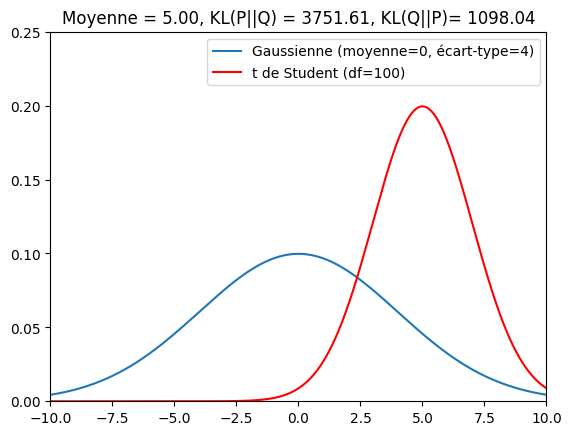

In [15]:
fig, ax = plt.subplots()
line1, = ax.plot(x, p, label='Gaussienne (moyenne=0, écart-type=4)')
line2, = ax.plot([], [], c='red', label='t de Student (df=100)')
title = ax.set_title('')
ax.legend()
ax.set_xlim(-10, 10)
ax.set_ylim(0, 0.25)

def init():
    line2.set_data([], [])
    return line2,

def animate(i):
    mu = mu_values[i]
    q = norm.pdf(x, mu, 2)
    kl_pq = kl_divergence(p, q)
    kl_qp = kl_divergence(q, p)
    line2.set_data(x, q)
    title.set_text('Moyenne = %1.2f, KL(P||Q) = %1.2f, KL(Q||P)= %1.2f' % (mu, kl_pq, kl_qp))
    return line2, title

ani = FuncAnimation(fig, animate, init_func=init, frames=len(mu_values), interval=100, blit=True)
ani.save('animation.mp4', writer='ffmpeg')
# Afficher l'animation
plt.show()


0.38190850097688755
0.3347952867143343


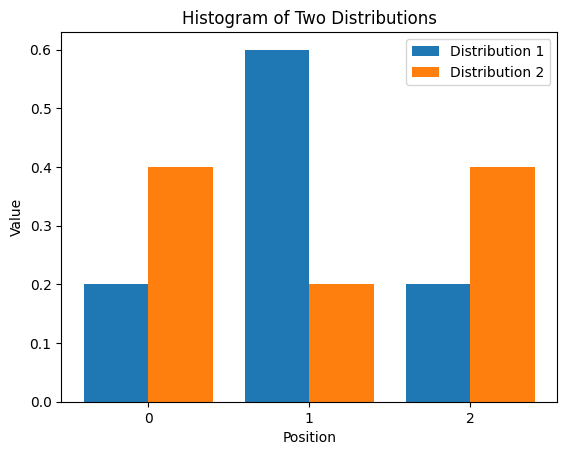

In [14]:
values1 = np.asarray([0.2,0.6,0.2])
values2 = np.asarray([0.40,0.2,0.40])

print( kl_divergence(values1, values2))
print( kl_divergence(values2, values1))

positions = np.arange(len(values1))

plt.bar(positions - 0.2, values1, width=0.4, label='Distribution 1')
plt.bar(positions + 0.2, values2, width=0.4, label='Distribution 2')

plt.xlabel('Position')
plt.ylabel('Value')
plt.title('Histogram of Two Distributions')
plt.xticks(positions, ['0', '1', '2'])
plt.legend()
plt.show()


In [15]:
results = []
results2 = []
for i, (p, q) in enumerate(zip(values1, values2)):
    result = p * np.log(p / q)
    results.append(result)
    results2.append(q * np.log(q / p))
    print(np.log(p / q))
    
print(results)
print(results2)

-0.6931471805599453
1.0986122886681096
-0.6931471805599453
[-0.13862943611198905, 0.6591673732008657, -0.13862943611198905]
[0.2772588722239781, -0.21972245773362192, 0.2772588722239781]
